# PRINCIPAL COMPONENT ANALYSIS

In [4]:
# eigen value - variance
# eigen vector - direction

In [18]:
# standardization
# covariance matrix
# eigen values , eigen vector
# sort eigen values
# projection matrix
# transorming data

In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('Universities.csv')
df.head()

Univ   SAT  Top10  Accept  SFRatio  Expenses  GradRate
0     Brown  1310     89      22       13     22704        94
1   CalTech  1415    100      25        6     63575        81
2       CMU  1260     62      59        9     25026        72
3  Columbia  1310     76      24       12     31510        88
4   Cornell  1280     83      33       13     21864        90

In [8]:
df.shape

(25, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [10]:
df.describe()

SAT       Top10     Accept   SFRatio      Expenses   GradRate
count    25.000000   25.000000  25.000000  25.00000     25.000000  25.000000
mean   1266.440000   76.480000  39.200000  12.72000  27388.000000  86.720000
std     108.359771   19.433905  19.727308   4.06735  14424.883165   9.057778
min    1005.000000   28.000000  14.000000   6.00000   8704.000000  67.000000
25%    1240.000000   74.000000  24.000000  11.00000  15140.000000  81.000000
50%    1285.000000   81.000000  36.000000  12.00000  27553.000000  90.000000
75%    1340.000000   90.000000  50.000000  14.00000  34870.000000  94.000000
max    1415.000000  100.000000  90.000000  25.00000  63575.000000  97.000000

In [11]:
df.dropna()

Univ   SAT  Top10  Accept  SFRatio  Expenses  GradRate
0          Brown  1310     89      22       13     22704        94
1        CalTech  1415    100      25        6     63575        81
2            CMU  1260     62      59        9     25026        72
3       Columbia  1310     76      24       12     31510        88
4        Cornell  1280     83      33       13     21864        90
5      Dartmouth  1340     89      23       10     32162        95
6           Duke  1315     90      30       12     31585        95
7     Georgetown  1255     74      24       12     20126        92
8        Harvard  1400     91      14       11     39525        97
9   JohnsHopkins  1305     75      44        7     58691        87
10           MIT  1380     94      30       10     34870        91
11  Northwestern  1260     85      39       11     28052        89
12     NotreDame  1255     81      42       13     15122        94
13     PennState  1081     38      54       18     10185        80
14     Princeton  1375     91      14        8     30220        95
15        Purdue  1005     28      90       19      9066        69
16      Stanford  1360     90      20       12     36450        93
17      TexasA&M  1075     49      67       25      8704        67
18    UCBerkeley  1240     95      40       17     15140        78
19      UChicago  1290     75      50       13     38380        87
20     UMichigan  1180     65      68       16     15470        85
21         UPenn  1285     80      36       11     27553        90
22           UVA  1225     77      44       14     13349        92
23    UWisconsin  1085     40      69       15     11857        71
24          Yale  1375     95      19       11     43514        96

In [12]:
df[df.duplicated]

Empty DataFrame
Columns: [Univ, SAT, Top10, Accept, SFRatio, Expenses, GradRate]
Index: []

In [13]:
df.isnull().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [14]:
df.corr(numeric_only = True)

SAT     Top10    Accept   SFRatio  Expenses  GradRate
SAT       1.000000  0.922522 -0.885850 -0.812552  0.778976  0.747712
Top10     0.922522  1.000000 -0.859181 -0.643435  0.611467  0.745942
Accept   -0.885850 -0.859181  1.000000  0.631664 -0.558439 -0.819550
SFRatio  -0.812552 -0.643435  0.631664  1.000000 -0.781839 -0.560922
Expenses  0.778976  0.611467 -0.558439 -0.781839  1.000000  0.393591
GradRate  0.747712  0.745942 -0.819550 -0.560922  0.393591  1.000000

In [15]:
#Take numerical data only
df = df.iloc[:,1:]
df

SAT  Top10  Accept  SFRatio  Expenses  GradRate
0   1310     89      22       13     22704        94
1   1415    100      25        6     63575        81
2   1260     62      59        9     25026        72
3   1310     76      24       12     31510        88
4   1280     83      33       13     21864        90
5   1340     89      23       10     32162        95
6   1315     90      30       12     31585        95
7   1255     74      24       12     20126        92
8   1400     91      14       11     39525        97
9   1305     75      44        7     58691        87
10  1380     94      30       10     34870        91
11  1260     85      39       11     28052        89
12  1255     81      42       13     15122        94
13  1081     38      54       18     10185        80
14  1375     91      14        8     30220        95
15  1005     28      90       19      9066        69
16  1360     90      20       12     36450        93
17  1075     49      67       25      8704        67
18  1240     95      40       17     15140        78
19  1290     75      50       13     38380        87
20  1180     65      68       16     15470        85
21  1285     80      36       11     27553        90
22  1225     77      44       14     13349        92
23  1085     40      69       15     11857        71
24  1375     95      19       11     43514        96

In [17]:
#1.Standardization
std = StandardScaler()
df_normal = std.fit_transform(df)
df_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

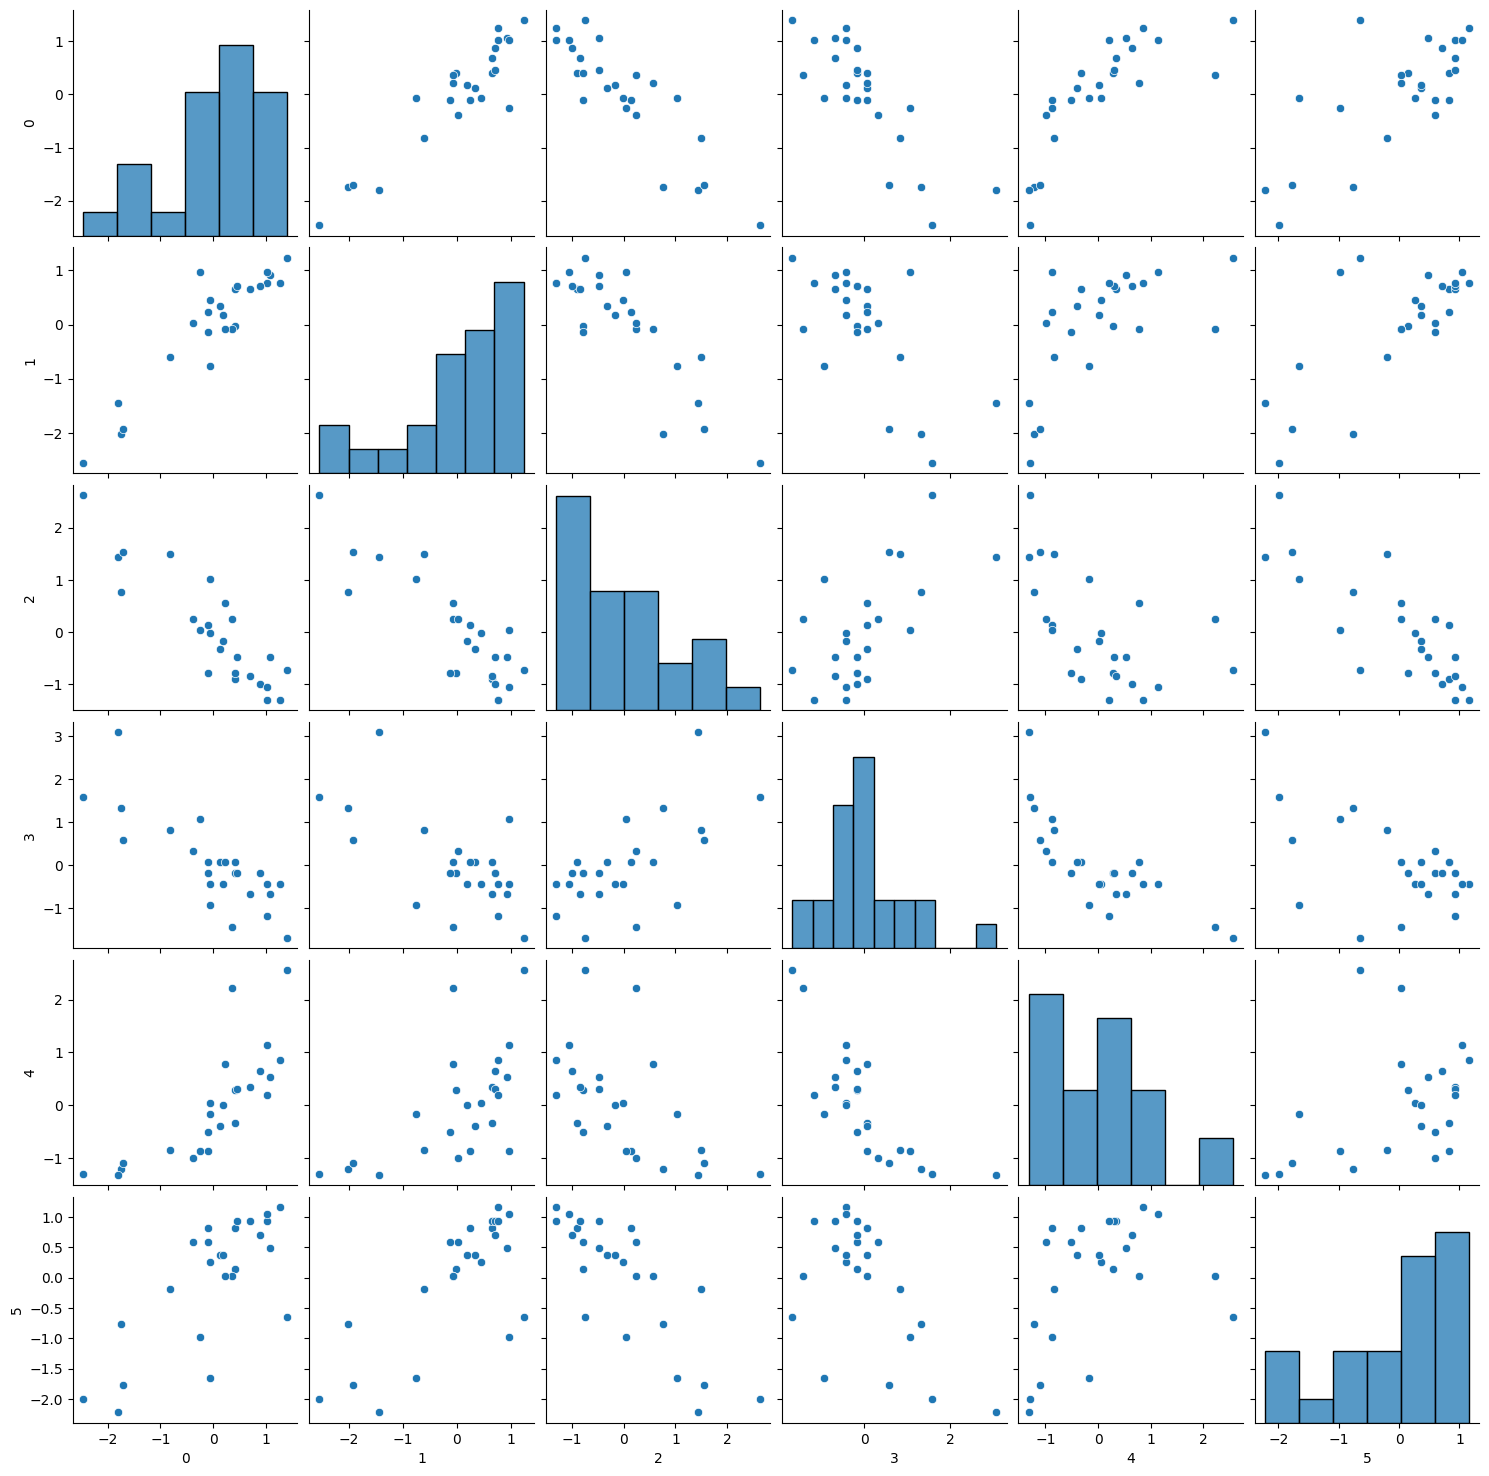

In [19]:
import seaborn as sns
sns.pairplot(pd.DataFrame(df_normal))

In [20]:
pd.DataFrame(df_normal).corr()

0         1         2         3         4         5
0  1.000000  0.922522 -0.885850 -0.812552  0.778976  0.747712
1  0.922522  1.000000 -0.859181 -0.643435  0.611467  0.745942
2 -0.885850 -0.859181  1.000000  0.631664 -0.558439 -0.819550
3 -0.812552 -0.643435  0.631664  1.000000 -0.781839 -0.560922
4  0.778976  0.611467 -0.558439 -0.781839  1.000000  0.393591
5  0.747712  0.745942 -0.819550 -0.560922  0.393591  1.000000

In [23]:
pca = PCA(n_components= None)
data = pca.fit_transform(df_normal)
pca_components = pd.DataFrame(data,columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])
pca_components

pc1       pc2       pc3       pc4       pc5       pc6
0   1.009874 -1.064310  0.081066 -0.056951 -0.128754 -0.034650
1   2.822238  2.259045  0.836829 -0.143845 -0.125962 -0.180703
2  -1.112466  1.631209 -0.266787 -1.075075 -0.191814  0.345679
3   0.741741 -0.042187  0.060501  0.157208 -0.577611  0.109163
4   0.311912 -0.635244  0.010241 -0.171364  0.012726 -0.016921
5   1.696691 -0.344363 -0.253408 -0.012564 -0.052661 -0.027166
6   1.246821 -0.490984 -0.032094  0.205644  0.293505 -0.078012
7   0.338750 -0.785169 -0.493585 -0.039856 -0.544979 -0.155372
8   2.374150 -0.386539  0.116098  0.453366 -0.230108  0.266984
9   1.403277  2.119515 -0.442827  0.632543  0.230054 -0.235615
10  1.726103  0.088237  0.170404 -0.260902  0.233318  0.238968
11  0.450857 -0.011133 -0.175746 -0.236166  0.263251 -0.314844
12 -0.040238 -1.009204 -0.496517 -0.229299  0.448032  0.004939
13 -3.233730 -0.374580 -0.495373  0.521238 -0.639295 -0.090048
14  2.236265 -0.371793 -0.398994 -0.406966 -0.416761  0.050619
15 -5.172992  0.779915 -0.385912  0.232212  0.179287 -0.030905
16  1.699644 -0.305597  0.318508  0.297463 -0.163425  0.114423
17 -4.578146 -0.347591  1.499642  0.454252 -0.191142  0.104149
18 -0.822603 -0.698906  1.427811 -0.760779  0.184260 -0.251103
19  0.097762  0.650446  0.100508  0.500097  0.487218  0.219242
20 -1.963183 -0.224768 -0.255881  0.048474  0.822746  0.152247
21  0.542289 -0.079589 -0.305393 -0.131699  0.052740 -0.036726
22 -0.532221 -1.017167 -0.423716 -0.169536  0.357813 -0.066099
23 -3.548697  0.778462 -0.449363 -0.323679 -0.358333 -0.077456
24  2.305900 -0.117704  0.253989  0.516183  0.055894 -0.010793

In [24]:
pca_components.corr()

pc1           pc2           pc3           pc4           pc5  \
pc1  1.000000e+00 -4.662458e-18 -5.794335e-17  3.065789e-17 -1.319647e-17   
pc2 -4.662458e-18  1.000000e+00  3.816960e-16 -5.721564e-17  9.962161e-17   
pc3 -5.794335e-17  3.816960e-16  1.000000e+00  8.199558e-17  8.161832e-17   
pc4  3.065789e-17 -5.721564e-17  8.199558e-17  1.000000e+00 -6.808341e-17   
pc5 -1.319647e-17  9.962161e-17  8.161832e-17 -6.808341e-17  1.000000e+00   
pc6 -1.867461e-17  5.028144e-16  2.171849e-16 -8.170401e-17 -2.520060e-16   

              pc6  
pc1 -1.867461e-17  
pc2  5.028144e-16  
pc3  2.171849e-16  
pc4 -8.170401e-17  
pc5 -2.520060e-16  
pc6  1.000000e+00

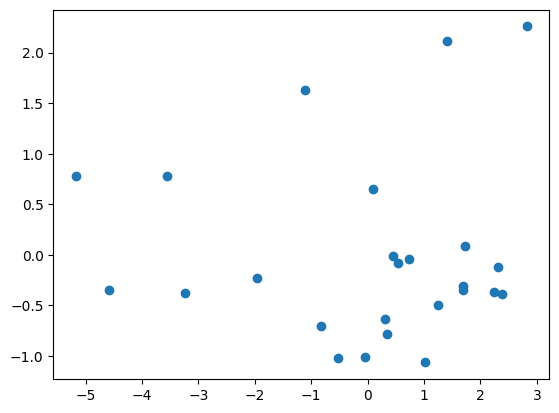

In [25]:
plt.scatter(pca_components.pc1,pca_components.pc2)

In [27]:
# variance ratio along pc
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [35]:
df = pd.read_csv('Universities.csv')
final_df = pd.concat([pd.DataFrame(pca_components.iloc[:,0:2],columns = ['pc1','pc2']),df[['Univ']]],axis =1)
final_df

pc1       pc2          Univ
0   1.009874 -1.064310         Brown
1   2.822238  2.259045       CalTech
2  -1.112466  1.631209           CMU
3   0.741741 -0.042187      Columbia
4   0.311912 -0.635244       Cornell
5   1.696691 -0.344363     Dartmouth
6   1.246821 -0.490984          Duke
7   0.338750 -0.785169    Georgetown
8   2.374150 -0.386539       Harvard
9   1.403277  2.119515  JohnsHopkins
10  1.726103  0.088237           MIT
11  0.450857 -0.011133  Northwestern
12 -0.040238 -1.009204     NotreDame
13 -3.233730 -0.374580     PennState
14  2.236265 -0.371793     Princeton
15 -5.172992  0.779915        Purdue
16  1.699644 -0.305597      Stanford
17 -4.578146 -0.347591      TexasA&M
18 -0.822603 -0.698906    UCBerkeley
19  0.097762  0.650446      UChicago
20 -1.963183 -0.224768     UMichigan
21  0.542289 -0.079589         UPenn
22 -0.532221 -1.017167           UVA
23 -3.548697  0.778462    UWisconsin
24  2.305900 -0.117704          Yale

<Axes: xlabel='pc1', ylabel='pc2'>

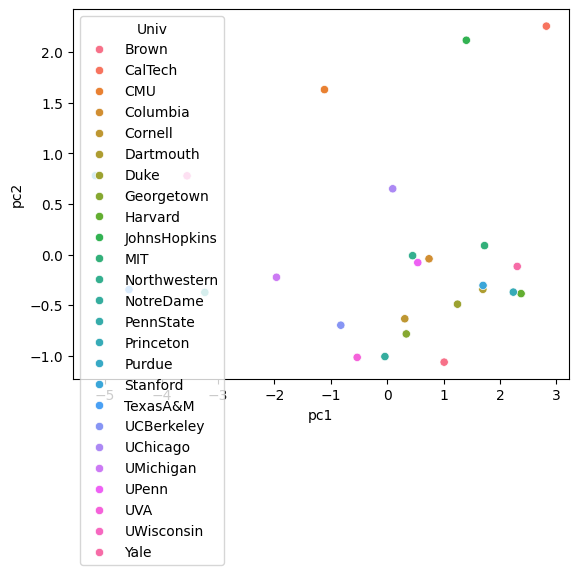

In [37]:
sns.scatterplot(final_df,x='pc1',y='pc2',hue='Univ')

In [39]:
final_df['cluster'] = [2,0,2,2,2,0,0,2,0,0,0,2,2,1,0,1,0,1,2,2,2,2,2,1,0]
final_df

pc1       pc2          Univ  cluster
0   1.009874 -1.064310         Brown        2
1   2.822238  2.259045       CalTech        0
2  -1.112466  1.631209           CMU        2
3   0.741741 -0.042187      Columbia        2
4   0.311912 -0.635244       Cornell        2
5   1.696691 -0.344363     Dartmouth        0
6   1.246821 -0.490984          Duke        0
7   0.338750 -0.785169    Georgetown        2
8   2.374150 -0.386539       Harvard        0
9   1.403277  2.119515  JohnsHopkins        0
10  1.726103  0.088237           MIT        0
11  0.450857 -0.011133  Northwestern        2
12 -0.040238 -1.009204     NotreDame        2
13 -3.233730 -0.374580     PennState        1
14  2.236265 -0.371793     Princeton        0
15 -5.172992  0.779915        Purdue        1
16  1.699644 -0.305597      Stanford        0
17 -4.578146 -0.347591      TexasA&M        1
18 -0.822603 -0.698906    UCBerkeley        2
19  0.097762  0.650446      UChicago        2
20 -1.963183 -0.224768     UMichigan        2
21  0.542289 -0.079589         UPenn        2
22 -0.532221 -1.017167           UVA        2
23 -3.548697  0.778462    UWisconsin        1
24  2.305900 -0.117704          Yale        0

<Axes: xlabel='pc1', ylabel='pc2'>

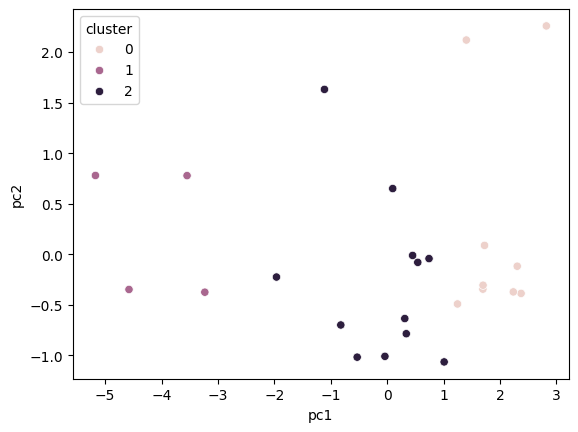

In [40]:
sns.scatterplot(final_df,x='pc1',y='pc2',hue='cluster')

<Axes: xlabel='pc1', ylabel='pc2'>

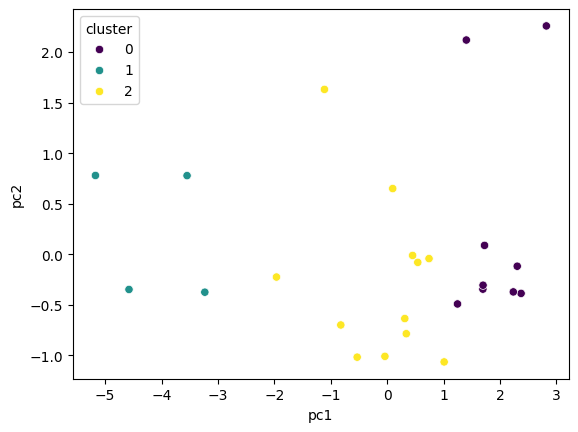

In [42]:
sns.scatterplot(final_df,x='pc1',y='pc2',hue='cluster',palette='viridis')

In [ ]:
## BREAST CANCER DATASET

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('breast_cancer.csv')
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [3]:
 df.shape

(569, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [6]:
df.dropna()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [7]:
df[df.duplicated]

Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
#Take numerical data only
df = df.iloc[:,1:]
df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [10]:
#1.Standardization
std = StandardScaler()
df_normal = std.fit_transform(df)
df_normal

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [11]:
#pd.DataFrame(df_normal).corr()

In [12]:
pca = PCA(n_components= 3)
data = pca.fit_transform(df_normal)
pca_components = pd.DataFrame(data,columns = ['pc1','pc2','pc3'])
pca_components

pc1        pc2       pc3
0     9.192837   1.948583 -1.123166
1     2.387802  -3.768172 -0.529293
2     5.733896  -1.075174 -0.551748
3     7.122953  10.275589 -3.232790
4     3.935302  -1.948072  1.389767
..         ...        ...       ...
564   6.439315  -3.576817  2.459487
565   3.793382  -3.584048  2.088476
566   1.256179  -1.902297  0.562731
567  10.374794   1.672010 -1.877029
568  -5.475243  -0.670637  1.490443

[569 rows x 3 columns]

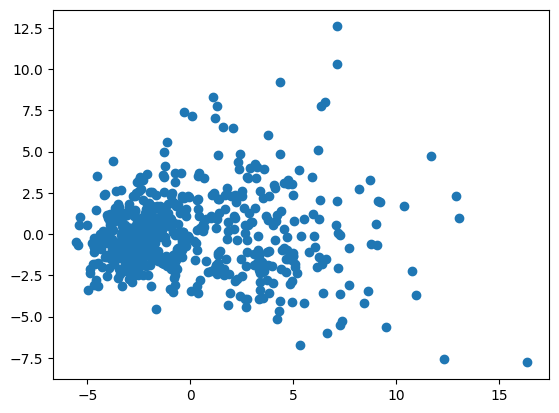

In [13]:
plt.scatter(pca_components.pc1,pca_components.pc2)

/home/rgukt/.local/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


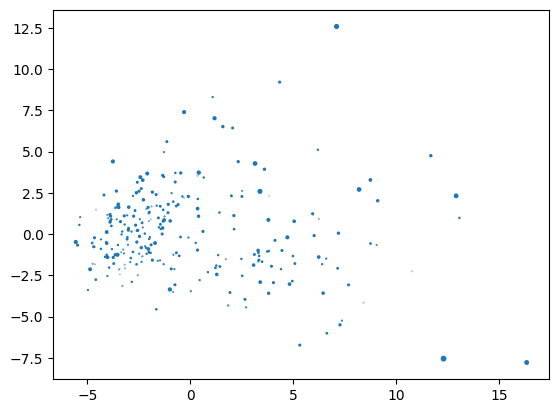

In [14]:
plt.scatter(pca_components.pc1,pca_components.pc2,pca_components.pc3)

In [15]:
# variance ratio along pc
var = pca.explained_variance_ratio_
var

array([0.44272026, 0.18971182, 0.09393163])

In [16]:
df = pd.read_csv('breast_cancer.csv')
final_df = pd.concat([pd.DataFrame(pca_components.iloc[:,0:3],columns = ['pc1','pc2','pc3']),df[['diagnosis']]],axis =1)
final_df

pc1        pc2       pc3 diagnosis
0     9.192837   1.948583 -1.123166         M
1     2.387802  -3.768172 -0.529293         M
2     5.733896  -1.075174 -0.551748         M
3     7.122953  10.275589 -3.232790         M
4     3.935302  -1.948072  1.389767         M
..         ...        ...       ...       ...
564   6.439315  -3.576817  2.459487         M
565   3.793382  -3.584048  2.088476         M
566   1.256179  -1.902297  0.562731         M
567  10.374794   1.672010 -1.877029         M
568  -5.475243  -0.670637  1.490443         B

[569 rows x 4 columns]

<Axes: xlabel='pc1', ylabel='pc2'>

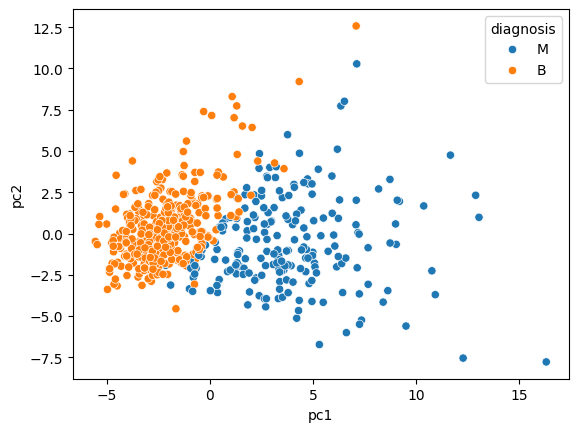

In [17]:
import seaborn as sns
sns.scatterplot(final_df,x='pc1',y='pc2',hue='diagnosis')

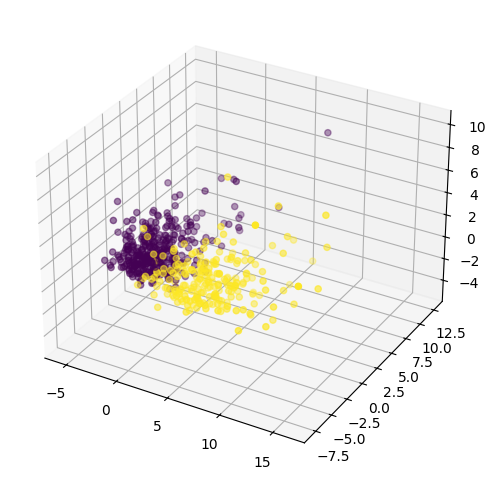

In [18]:
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    final_df['pc1'], 
    final_df['pc2'], 
    final_df['pc3'], 
    c=final_df['diagnosis'].astype('category').cat.codes,  # map diagnosis to colors
    cmap='viridis'
)

In [35]:
import plotly.io as pio
pio.renderers.default = "notebook"   # or "notebook_connected"

In [36]:
import plotly.express as px
fig = px.scatter_3d(final_df,x='pc1',y='pc2',z='pc3',color='diagnosis',size_max = 10,opacity = 0.7)
fig.show()

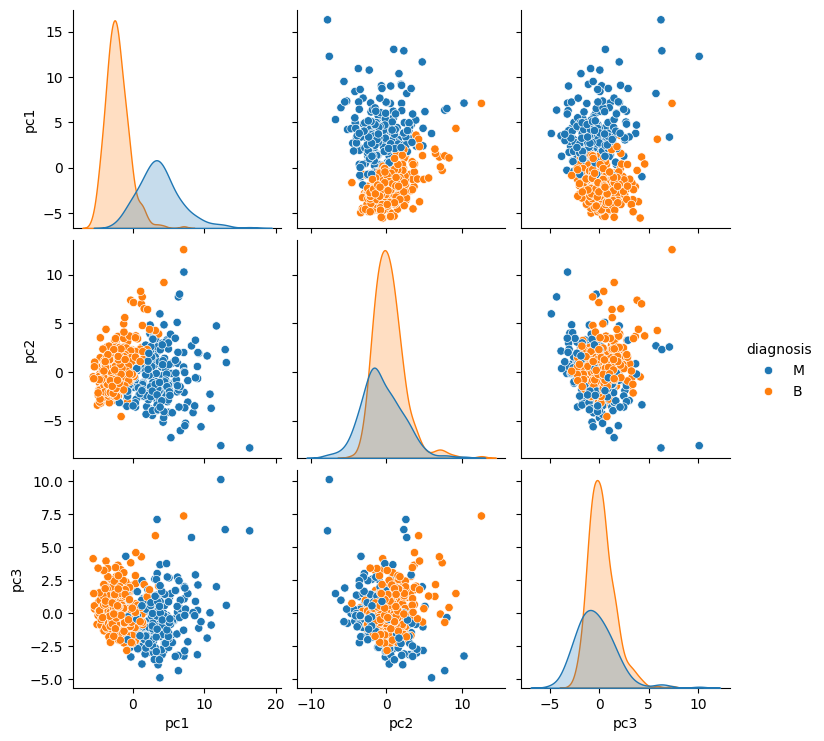

In [19]:
import seaborn as sns

sns.pairplot(final_df, vars=['pc1','pc2','pc3'], hue='diagnosis')

<Axes: xlabel='pc1', ylabel='pc2'>

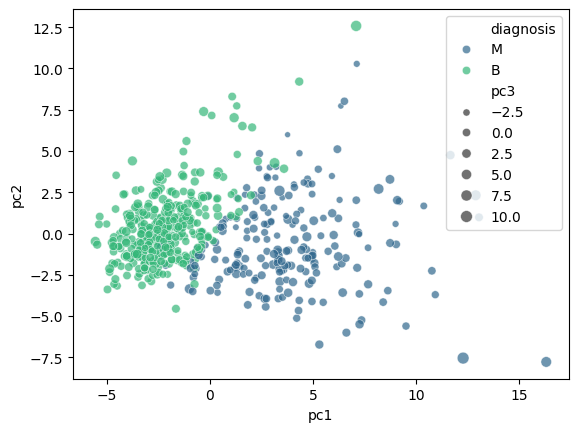

In [22]:
sns.scatterplot(
    data=final_df,
    x='pc1', y='pc2',
    size='pc3',
    hue='diagnosis',
    palette='viridis',
    alpha=0.7
)

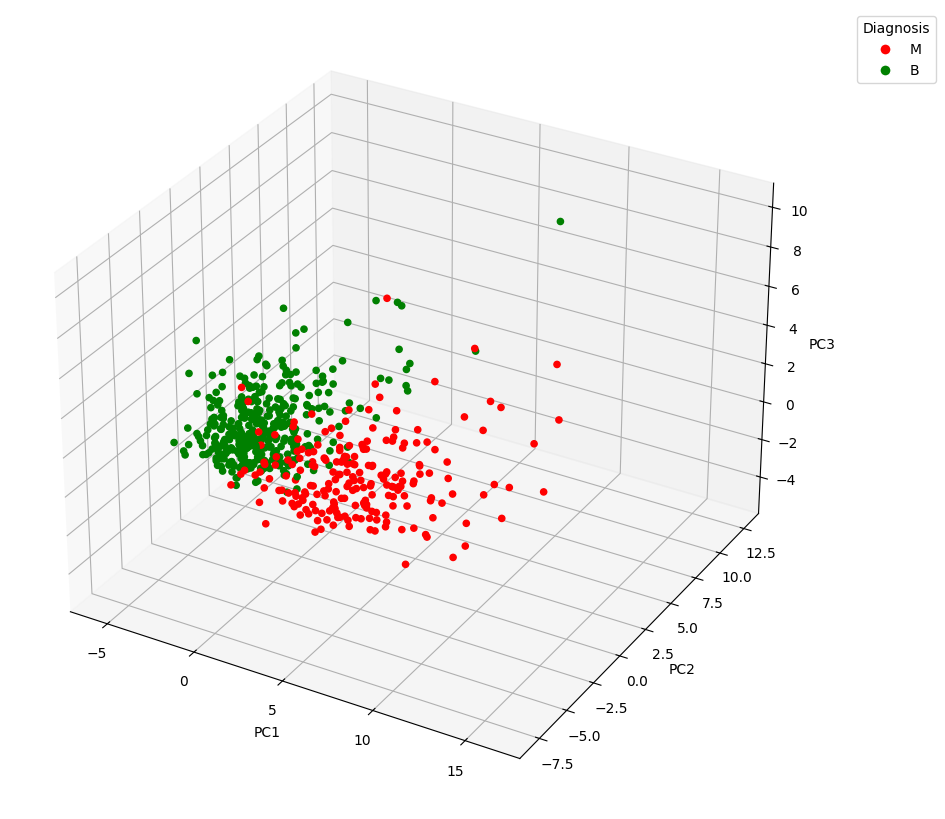

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns

# Extract coordinates
x = final_df['pc1']
y = final_df['pc2']
z = final_df['pc3']

# Map diagnosis to colors
col = final_df['diagnosis'].map({'M':'r','B':'g'})

# Create 3D figure and axes
fig = plt.figure(figsize=(8,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Scatter plot
sc = ax.scatter(x, y, z, s=20, c=col, marker='o', alpha=1.0)

# Labels
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Manual legend
plt.legend(handles=[
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='r', label='M', markersize=8),
    plt.Line2D([], [], marker='o', color='w', markerfacecolor='g', label='B', markersize=8)
], title="Diagnosis", bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

## X-CATEGORICAL MULTIPLE REGRESSION

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [70]:
 # Load dataset (from UCI or Kaggle link)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# Column names (as per UCI documentation)
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",
           "num-of-doors", "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
           "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]

df = pd.read_csv(url, names=columns)
df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19    3.40              10.0        102   
4            136         mpfi  3.19    3.40               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01    3.40              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [71]:
df.shape

(205, 26)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [73]:
df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

In [74]:
df.dropna()

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19    3.40              10.0        102   
4            136         mpfi  3.19    3.40               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01    3.40              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [75]:
df[df.duplicated]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]

In [76]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [77]:
# but question marks
# data clean
df.replace('?',np.nan,inplace=True)

In [78]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [79]:
df = df.dropna(subset=['price'])

<Axes: >

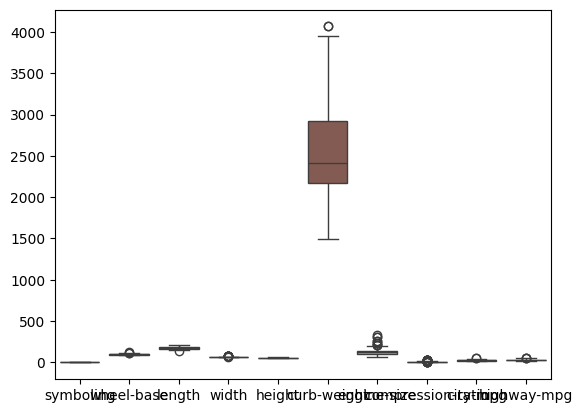

In [80]:
import seaborn as sns
sns.boxplot(df)

In [81]:
# Convert selected columns to numeric (forcing errors to NaN)
numeric_cols = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values with median of each column
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])
df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              115.0  alfa-romero       gas        std   
1          3              115.0  alfa-romero       gas        std   
2          1              115.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0      111.0   
1          130         mpfi  3.47    2.68               9.0      111.0   
2          152         mpfi  2.68    3.47               9.0      154.0   
3          109         mpfi  3.19    3.40              10.0      102.0   
4          136         mpfi  3.19    3.40               8.0      115.0   

   peak-rpm city-mpg  highway-mpg  price  
0    5000.0       21           27  13495  
1    5000.0       21           27  16500  
2    5000.0       19           26  16500  
3    5500.0       24           30  13950  
4    5500.0       18           22  17450  

[5 rows x 26 columns]

In [82]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [83]:
X= df.drop('price',axis = 1)
y = df['price']

In [84]:
#separate categorical n numeric cols
categorical_cols = X.select_dtypes(include='object').columns

for x in categorical_cols:
    print(x,'has',df[x].nunique(),'categories')

make has 22 categories
fuel-type has 2 categories
aspiration has 2 categories
num-of-doors has 2 categories
body-style has 5 categories
drive-wheels has 3 categories
engine-location has 2 categories
engine-type has 6 categories
num-of-cylinders has 7 categories
fuel-system has 8 categories


In [85]:
X

symboling  normalized-losses         make fuel-type aspiration  \
0            3              115.0  alfa-romero       gas        std   
1            3              115.0  alfa-romero       gas        std   
2            1              115.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     num-of-cylinders  engine-size  fuel-system  bore stroke  \
0                four          130         mpfi  3.47   2.68   
1                four          130         mpfi  3.47   2.68   
2                 six          152         mpfi  2.68   3.47   
3                four          109         mpfi  3.19   3.40   
4                five          136         mpfi  3.19   3.40   
..                ...          ...          ...   ...    ...   
200              four          141         mpfi  3.78   3.15   
201              four          141         mpfi  3.78   3.15   
202               six          173         mpfi  3.58   2.87   
203               six          145          idi  3.01   3.40   
204              four          141         mpfi  3.78   3.15   

    compression-ratio  horsepower peak-rpm  city-mpg  highway-mpg  
0                 9.0       111.0   5000.0        21           27  
1                 9.0       111.0   5000.0        21           27  
2                 9.0       154.0   5000.0        19           26  
3                10.0       102.0   5500.0        24           30  
4                 8.0       115.0   5500.0        18           22  
..                ...         ...      ...       ...          ...  
200               9.5       114.0   5400.0        23           28  
201               8.7       160.0   5300.0        19           25  
202               8.8       134.0   5500.0        18           23  
203              23.0       106.0   4800.0        26           27  
204               9.5       114.0   5400.0        19           25  

[201 rows x 25 columns]

In [86]:
# 22 categories so drop it as categories
# one hot categorical
X =  pd.get_dummies(X,columns = categorical_cols,drop_first = True)
X

symboling  normalized-losses  wheel-base  length  width  height  \
0            3              115.0        88.6   168.8   64.1    48.8   
1            3              115.0        88.6   168.8   64.1    48.8   
2            1              115.0        94.5   171.2   65.5    52.4   
3            2              164.0        99.8   176.6   66.2    54.3   
4            2              164.0        99.4   176.6   66.4    54.3   
..         ...                ...         ...     ...    ...     ...   
200         -1               95.0       109.1   188.8   68.9    55.5   
201         -1               95.0       109.1   188.8   68.8    55.5   
202         -1               95.0       109.1   188.8   68.9    55.5   
203         -1               95.0       109.1   188.8   68.9    55.5   
204         -1               95.0       109.1   188.8   68.9    55.5   

     curb-weight  engine-size  bore  stroke  ...  num-of-cylinders_three  \
0           2548          130  3.47    2.68  ...                   False   
1           2548          130  3.47    2.68  ...                   False   
2           2823          152  2.68    3.47  ...                   False   
3           2337          109  3.19    3.40  ...                   False   
4           2824          136  3.19    3.40  ...                   False   
..           ...          ...   ...     ...  ...                     ...   
200         2952          141  3.78    3.15  ...                   False   
201         3049          141  3.78    3.15  ...                   False   
202         3012          173  3.58    2.87  ...                   False   
203         3217          145  3.01    3.40  ...                   False   
204         3062          141  3.78    3.15  ...                   False   

     num-of-cylinders_twelve  num-of-cylinders_two  fuel-system_2bbl  \
0                      False                 False             False   
1                      False                 False             False   
2                      False                 False             False   
3                      False                 False             False   
4                      False                 False             False   
..                       ...                   ...               ...   
200                    False                 False             False   
201                    False                 False             False   
202                    False                 False             False   
203                    False                 False             False   
204                    False                 False             False   

     fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  \
0               False            False            False              True   
1               False            False            False              True   
2               False            False            False              True   
3               False            False            False              True   
4               False            False            False              True   
..                ...              ...              ...               ...   
200             False            False            False              True   
201             False            False            False              True   
202             False            False            False              True   
203             False             True            False             False   
204             False            False            False              True   

     fuel-system_spdi  fuel-system_spfi  
0               False             False  
1               False             False  
2               False             False  
3               False             False  
4               False             False  
..                ...               ...  
200             False             False  
201             False             False  
202             False             False  
203             F

In [51]:
X.shape

(201, 64)

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  = 0.2,random_state = 42)
# Fit multiple linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred = model.predict(X_test)
y_pred

array([ 7307.84469261, 28075.74685494,  6612.23242193,  7461.60114972,
       12921.11551251,  5564.11482863, 43457.28063981,  9672.30235097,
       16329.79263941, 32386.8250434 , 25098.95933221, 10374.82958438,
       10587.25332026,  8139.55226581, 12276.0287168 ,  8316.55748358,
       10113.70078126,  7204.27540417,  9064.85491008, 42368.71636366,
       32528.        , 31230.98501152,  6798.00160087,  6987.00779444,
       25899.21297587, 10231.4129865 , 10998.85426117, 27858.40139043,
       35657.20021682, 15335.14711986, 18227.97344485,  5641.73632625,
       19328.72687323,  6766.11741817,  5078.44831478, 13779.93311863,
        6493.43766557,  8109.60731358, 10955.78280754,  8632.755649  ,
       12873.18370389])

In [89]:
print("MSE:",mean_squared_error(y_pred,y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred,y_test)))
print("R2 score:",r2_score(y_pred,y_test))

MSE: 10883796.73842636
RMSE: 3299.0599779977265
R2 score: 0.9032821963321851


In [90]:
# dropping make
# 22 categories so drop it as categories
# one hot categorical
X1 = df.drop(columns = ['make','price'])
y = df['price']
X1

symboling  normalized-losses fuel-type aspiration num-of-doors  \
0            3              115.0       gas        std          two   
1            3              115.0       gas        std          two   
2            1              115.0       gas        std          two   
3            2              164.0       gas        std         four   
4            2              164.0       gas        std         four   
..         ...                ...       ...        ...          ...   
200         -1               95.0       gas        std         four   
201         -1               95.0       gas      turbo         four   
202         -1               95.0       gas        std         four   
203         -1               95.0    diesel      turbo         four   
204         -1               95.0       gas      turbo         four   

      body-style drive-wheels engine-location  wheel-base  length  ...  \
0    convertible          rwd           front        88.6   168.8  ...   
1    convertible          rwd           front        88.6   168.8  ...   
2      hatchback          rwd           front        94.5   171.2  ...   
3          sedan          fwd           front        99.8   176.6  ...   
4          sedan          4wd           front        99.4   176.6  ...   
..           ...          ...             ...         ...     ...  ...   
200        sedan          rwd           front       109.1   188.8  ...   
201        sedan          rwd           front       109.1   188.8  ...   
202        sedan          rwd           front       109.1   188.8  ...   
203        sedan          rwd           front       109.1   188.8  ...   
204        sedan          rwd           front       109.1   188.8  ...   

     num-of-cylinders  engine-size  fuel-system  bore stroke  \
0                four          130         mpfi  3.47   2.68   
1                four          130         mpfi  3.47   2.68   
2                 six          152         mpfi  2.68   3.47   
3                four          109         mpfi  3.19   3.40   
4                five          136         mpfi  3.19   3.40   
..                ...          ...          ...   ...    ...   
200              four          141         mpfi  3.78   3.15   
201              four          141         mpfi  3.78   3.15   
202               six          173         mpfi  3.58   2.87   
203               six          145          idi  3.01   3.40   
204              four          141         mpfi  3.78   3.15   

     compression-ratio horsepower  peak-rpm  city-mpg  highway-mpg  
0                  9.0      111.0    5000.0        21           27  
1                  9.0      111.0    5000.0        21           27  
2                  9.0      154.0    5000.0        19           26  
3                 10.0      102.0    5500.0        24           30  
4                  8.0      115.0    5500.0        18           22  
..                 ...        ...       ...       ...          ...  
200                9.5      114.0    5400.0        23           28  
201                8.7      160.0    5300.0        19           25  
202                8.8      134.0    5500.0        18           23  
203               23.0      106.0    4800.0        26           27  
204                9.5      114.0    5400.0        19           25  

[201 rows x 24 columns]

In [91]:
#separate categorical n numeric cols
categorical_cols = X1.select_dtypes(include='object').columns

for x in categorical_cols:
    print(x,'has',df[x].nunique(),'categories')

fuel-type has 2 categories
aspiration has 2 categories
num-of-doors has 2 categories
body-style has 5 categories
drive-wheels has 3 categories
engine-location has 2 categories
engine-type has 6 categories
num-of-cylinders has 7 categories
fuel-system has 8 categories


In [92]:
X1 = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X1

KeyError: "None of [Index(['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',\n       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'],\n      dtype='object')] are in the [columns]"

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit linear regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size  = 0.2,random_state = 42)
# Fit multiple linear Regression
model1 = LinearRegression()
model1.fit(X_train,y_train)

ValueError: could not convert string to float: 'gas'

In [ ]:
y_pred1 = model.predict(X_test)
y_pred1

In [ ]:
print("MSE:",mean_squared_error(y_pred,y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred,y_test)))
print("R2 score:",r2_score(y_pred,y_test))

print("----------------------------")
print("MSE:",mean_squared_error(y_pred1,y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred1,y_test)))
print("R2 score:",r2_score(y_pred1,y_test))

In [61]:
# coefficients 
coefficients = pd.DataFrame({
    'Features':X.columns,
    'Coefficient': model.coef_}).sort_values(by='Coefficient',ascending = False)
print("Top 10\n")
print(coefficients.head(20))

Top 10

                Features  Coefficient
45  engine-location_rear  7422.815170
16              make_bmw  5921.021154
29          make_porsche  5836.110569
59       fuel-system_idi  5193.404642
15             make_audi  3684.810222
21           make_jaguar  3472.112796
48      engine-type_ohcf  3325.941643
31             make_saab  2946.655045
63      fuel-system_spfi  2752.893153
44      drive-wheels_rwd  2472.073563
23    make_mercedes-benz  2254.471516
57      fuel-system_2bbl  2164.349385
60       fuel-system_mfi  2102.356486
61      fuel-system_mpfi  1939.618713
37      aspiration_turbo  1651.802699
62      fuel-system_spdi  1128.342434
27           make_peugot   919.304633
4                  width   516.243082
47       engine-type_ohc   454.571489
43      drive-wheels_fwd   339.718411


In [56]:
ls = Lasso(alpha = 3)
ls.fit(X_train,y_train)

Lasso(alpha=3)

In [57]:
y_pred = model.predict(X_test)
y_pred

array([ 7307.84469261, 28075.74685494,  6612.23242193,  7461.60114972,
       12921.11551251,  5564.11482863, 43457.28063981,  9672.30235097,
       16329.79263941, 32386.8250434 , 25098.95933221, 10374.82958438,
       10587.25332026,  8139.55226581, 12276.0287168 ,  8316.55748358,
       10113.70078126,  7204.27540417,  9064.85491008, 42368.71636366,
       32528.        , 31230.98501152,  6798.00160087,  6987.00779444,
       25899.21297587, 10231.4129865 , 10998.85426117, 27858.40139043,
       35657.20021682, 15335.14711986, 18227.97344485,  5641.73632625,
       19328.72687323,  6766.11741817,  5078.44831478, 13779.93311863,
        6493.43766557,  8109.60731358, 10955.78280754,  8632.755649  ,
       12873.18370389])

In [58]:
print("MSE:",mean_squared_error(y_pred,y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_pred,y_test)))
print("R2 score:",r2_score(y_pred,y_test))

MSE: 10883796.73842636
RMSE: 3299.0599779977265
R2 score: 0.9032821963321851


In [62]:
# coefficients 
coefficients = pd.DataFrame({
    'Features':X.columns,
    'Coefficient': ls.coef_}).sort_values(by='Coefficient',ascending = False)
print("Top 10\n")
print(coefficients.head(20))

Top 10

                Features  Coefficient
45  engine-location_rear  9512.364708
16              make_bmw  7161.060965
29          make_porsche  6580.143116
23    make_mercedes-benz  5041.279134
15             make_audi  4463.600102
31             make_saab  2690.620320
37      aspiration_turbo  1958.129628
44      drive-wheels_rwd  1630.016255
57      fuel-system_2bbl  1103.911176
61      fuel-system_mpfi   941.454104
4                  width   524.231009
35            make_volvo   395.740596
22            make_mazda   359.828651
21           make_jaguar   307.759175
2             wheel-base   209.652931
14           highway-mpg   110.810293
63      fuel-system_spfi    93.605469
7            engine-size    73.651345
34       make_volkswagen    17.529566
59       fuel-system_idi    17.519552
